In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display


In [2]:
df = pd.read_csv("clean_glassdoor_job_data.csv")
pd.options.display.max_columns = 99
display(df.head(5))

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_Title,Seniority,Salary,Min_Salary,Max_Salary,Average_Salary,Employer_Provide,Company_Name,Job_State,Same_State,Company_Age,Python,Spark,R_Studio,SQL,AWS,Statistics,Excel,Bachelor,Description_len,Competitiors_Number
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,Na,53-91,53,91,72.0,False,Tecolote Research,NM,False,48,True,False,False,False,False,False,True,True,2536,0
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist,Na,63-112,63,112,87.5,False,University of Maryland Medical System,MD,False,37,True,False,False,False,False,True,False,False,4783,0
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist,Na,80-90,80,90,85.0,False,KnowBe4,FL,True,11,True,True,False,True,False,True,True,False,3461,0
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Na,56-97,56,97,76.5,False,PNNL,WA,True,56,True,False,False,False,False,True,False,False,3883,3
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Na,86-143,86,143,114.5,False,Affinity Solutions,NY,True,23,True,False,False,True,False,True,True,False,2728,3


In [3]:
df.describe()

,Rating,Founded,Min_Salary,Max_Salary,Average_Salary,Company_Age,Description_len,Competitiors_Number
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,74.719677,128.149596,101.434636,47.524259,3869.545822,1.053908
std,0.801210,497.183763,30.980593,45.220324,37.546122,53.839080,1521.495868,1.384239
min,-1.000000,-1.000000,15.000000,16.000000,15.500000,-1.000000,407.000000,0.000000
25%,3.300000,1939.000000,52.000000,96.000000,73.500000,12.000000,2801.000000,0.000000
50%,3.700000,1988.000000,69.500000,124.000000,97.500000,25.000000,3731.000000,0.000000
75%,4.000000,2007.000000,91.000000,155.000000,122.500000,60.000000,4740.000000,3.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,277.000000,10051.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Salary Estimate      742 non-null    object 
 1   Job Description      742 non-null    object 
 2   Rating               742 non-null    float64
 3   Company Name         742 non-null    object 
 4   Location             742 non-null    object 
 5   Headquarters         742 non-null    object 
 6   Size                 742 non-null    object 
 7   Founded              742 non-null    int64  
 8   Type of ownership    742 non-null    object 
 9   Industry             742 non-null    object 
 10  Sector               742 non-null    object 
 11  Revenue              742 non-null    object 
 12  Competitors          742 non-null    object 
 13  Job_Title            742 non-null    object 
 14  Seniority            742 non-null    object 
 15  Salary               742 non-null    obj

# Overview

* **Quantitative / Numerical Data**

In [5]:
#numerical data
numeric_data = df.select_dtypes(exclude=['object', 'bool'])
numeric_data.columns

Index(['Rating', 'Founded', 'Min_Salary', 'Max_Salary', 'Average_Salary',
       'Company_Age', 'Description_len', 'Competitiors_Number'],
      dtype='object')

* **Quanlitative / Catagorical Data**

In [6]:
#categorical data
catagorical_data = df.select_dtypes(include=['object','bool'])
catagorical_data.columns

Index(['Salary Estimate', 'Job Description', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Competitors', 'Job_Title', 'Seniority', 'Salary',
       'Employer_Provide', 'Company_Name', 'Job_State', 'Same_State', 'Python',
       'Spark', 'R_Studio', 'SQL', 'AWS', 'Statistics', 'Excel', 'Bachelor'],
      dtype='object')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='Average_Salary'>

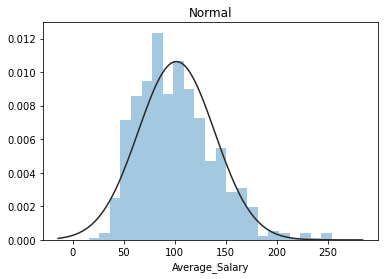

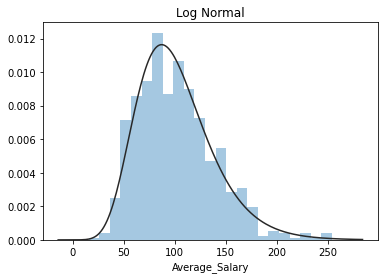

In [10]:
y = df['Average_Salary']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

# Univariate Analysis

Univariate is the simplest form of statistical analysis. It can be descriptive or inferential. Uni means “one”. So in this type of analysis, data contains only one variable. Univariate data analysis don’t need to find relation between variable. It purpose is to summaries that one variables' data and find out the pattern that exist in that data.


## Quantitative / Numerical Data



C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

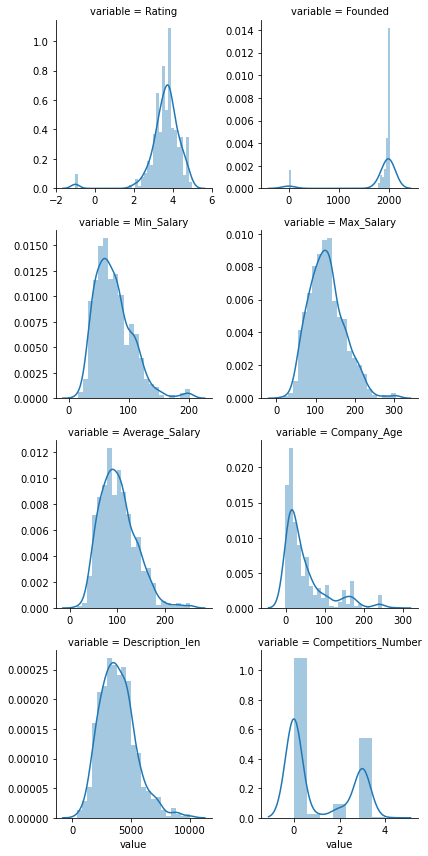

In [11]:
f = pd.melt(df, value_vars=numeric_data)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

apperantly not all quantative values normal distribution. Minimum salaray, Average salary and Description Lenght follow normal desctribution. So if we want to perform any linerar regression we need normalize this before.

# Catagorical / Qualitative Data


In [12]:
catagorical_data.columns

Index(['Salary Estimate', 'Job Description', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Competitors', 'Job_Title', 'Seniority', 'Salary',
       'Employer_Provide', 'Company_Name', 'Job_State', 'Same_State', 'Python',
       'Spark', 'R_Studio', 'SQL', 'AWS', 'Statistics', 'Excel', 'Bachelor'],
      dtype='object')

For catagorcal data I will choose specific columns

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


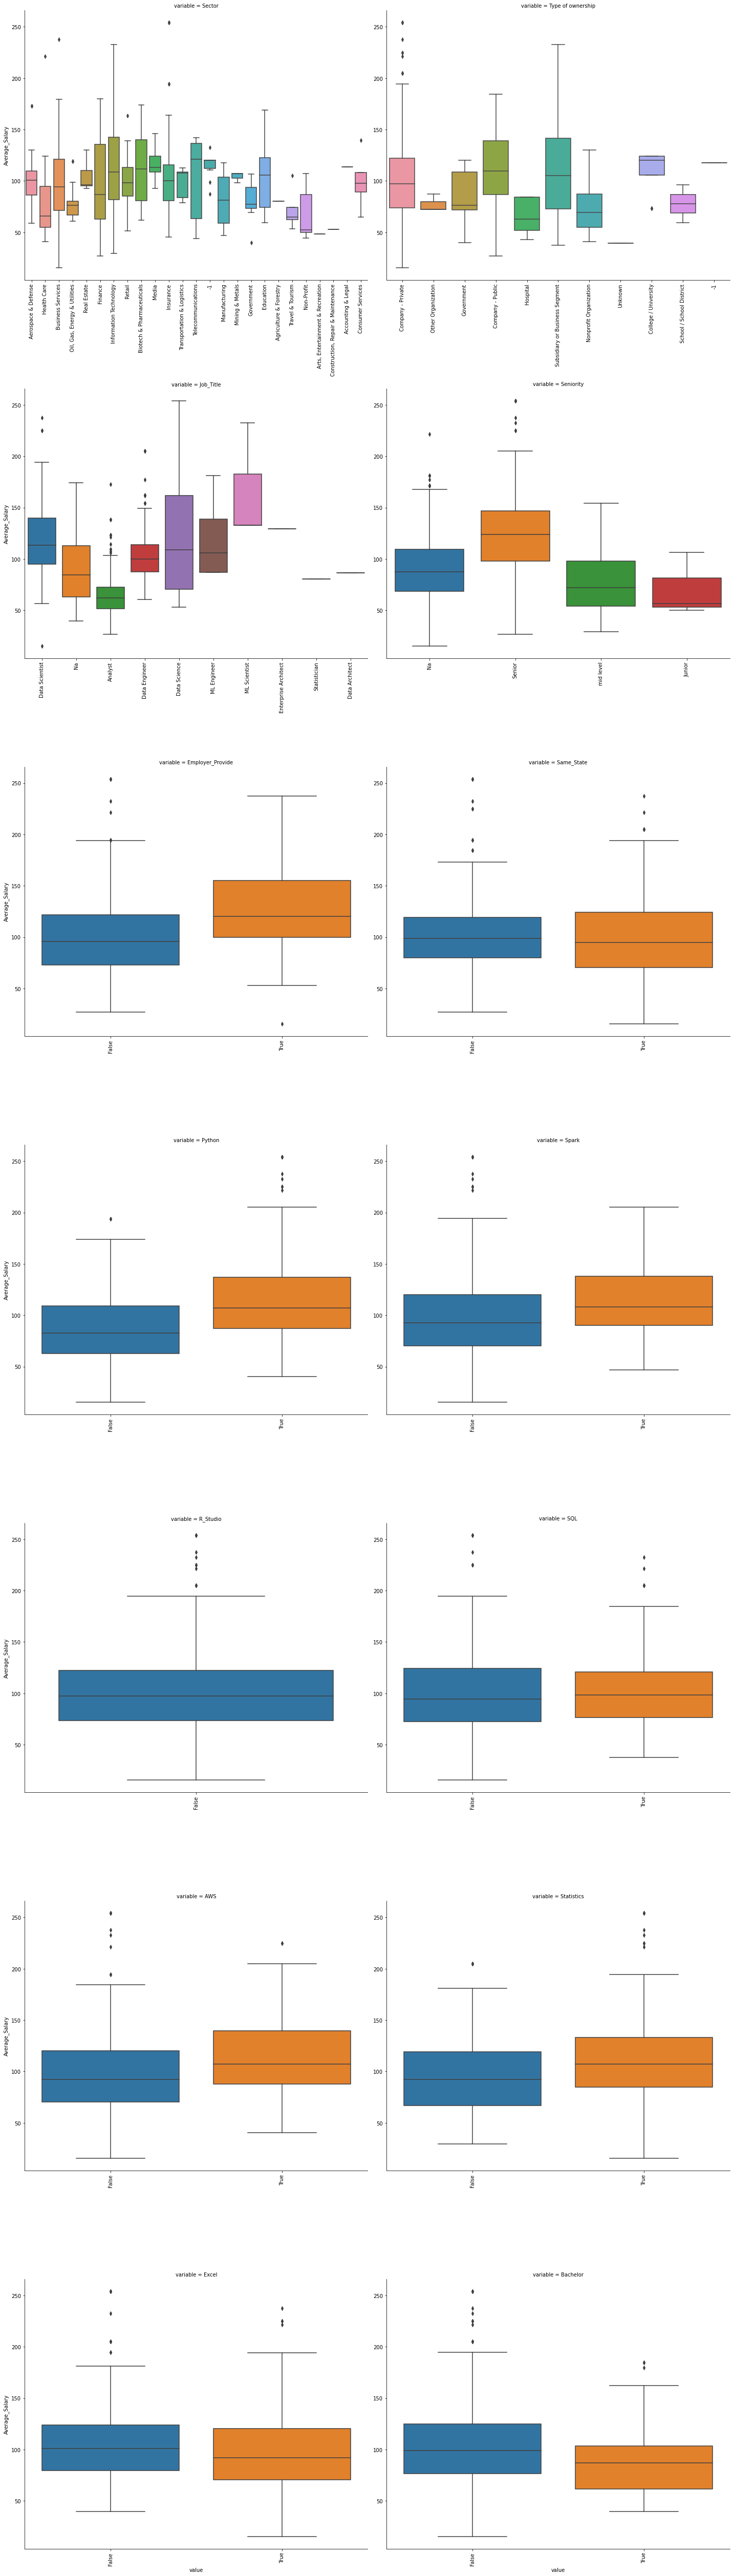

In [15]:
catagorical = catagorical_data[['Sector', 'Type of ownership','Job_Title', 'Seniority','Employer_Provide' ,'Same_State', 'Python', 'Spark', 'R_Studio', 'SQL', 'AWS', 'Statistics', 'Excel', 'Bachelor']]
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars= ['Average_Salary'], value_vars=catagorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=10)
g = g.map(boxplot, "value", "Average_Salary")

These data is very diverse. It seems like Data Scientist earn highest salary in data science market. Beside state is factor in job salary. Highest paying job state is CA also 50% its' job is higher then 100k.

# Correlation

Checking correlation is important. Because if I want to build a model which will perform regression then we must avoid those variable which have negative correlation.

* Quantitative Data: 

In [24]:
numeric_data.columns

Index(['Rating', 'Founded', 'Min_Salary', 'Max_Salary', 'Average_Salary',
       'Company_Age', 'Description_len', 'Competitiors_Number'],
      dtype='object')

Not all quatitative data are necessary for our model building. I will choose some columns which I think is necessary to check the correlation. 

In [67]:
quatitaitve =numeric_data[[ 'Average_Salary','Rating','Company_Age', 'Description_len', 'Competitiors_Number']].corr()
quatitaitve

,Average_Salary,Rating,Company_Age,Description_len,Competitiors_Number
Average_Salary,1.000000,0.012517,0.021936,0.070474,0.083263
Rating,0.012517,1.000000,0.023162,-0.012281,0.027190
Company_Age,0.021936,0.023162,1.000000,0.164188,0.127482
Description_len,0.070474,-0.012281,0.164188,1.000000,0.104620
Competitiors_Number,0.083263,0.027190,0.127482,0.104620,1.000000


* I thought **Average_Salaray** and **Rating** would have highest correlation. Though its a positive relation but higher rating of a company doesn't mean higher salary.
* Only one negative relation preasent in the table which is between **Rating** and **Description Length**.
* Interesting fact **Competitiors_Number** and **Average_Salary** has the highest corrlation.

In [86]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

<AxesSubplot:>

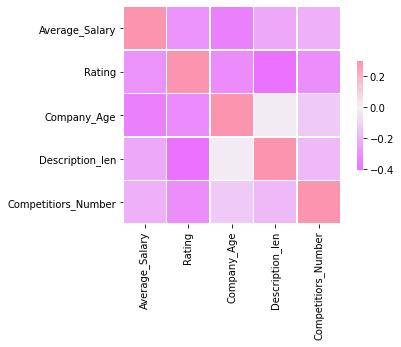

In [92]:
cmap =sns.diverging_palette(300,359,99,67,1, as_cmap= True)
sns.heatmap(quatitaitve.corr(),vmax=.3,center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Form the heatmap I am getting a clear view. **Rating** is mostly negatively correlated with every column. So for regression I must avoid this column.  
* Qualitative Data: 

In [65]:
catagorical_data.columns

Index(['Salary Estimate', 'Job Description', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Competitors', 'Job_Title', 'Seniority', 'Salary',
       'Employer_Provide', 'Company_Name', 'Job_State', 'Same_State', 'Python',
       'Spark', 'R_Studio', 'SQL', 'AWS', 'Statistics', 'Excel', 'Bachelor'],
      dtype='object')

In [123]:
qualitative =  catagorical_data[[ 'Type of ownership', 'Sector', 'Competitors', 'Job_Title', 'Seniority', 'Salary',
                                   'Employer_Provide', 'Job_State', 'Same_State', 'Python','Spark', 'R_Studio',
                                 'SQL', 'AWS', 'Statistics', 'Excel', 'Bachelor']]

graph for Type of ownership: total = 742


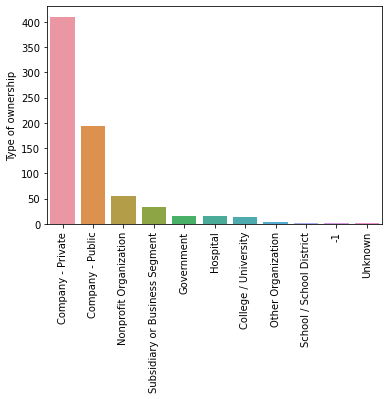

graph for Sector: total = 742


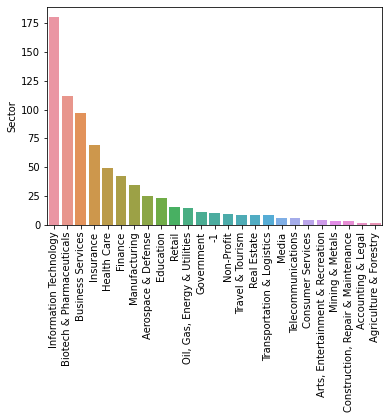

graph for Competitors: total = 742


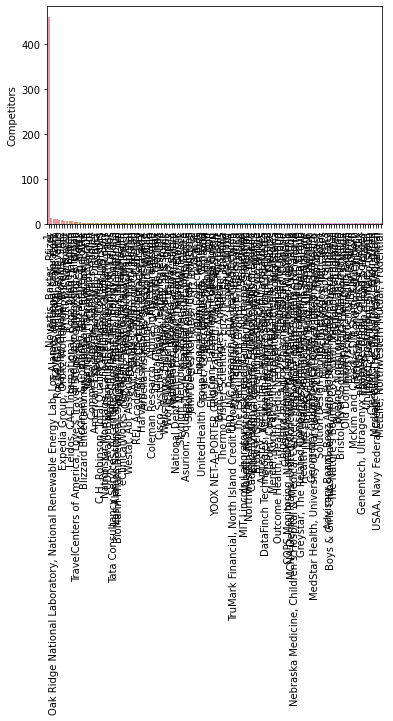

graph for Job_Title: total = 742


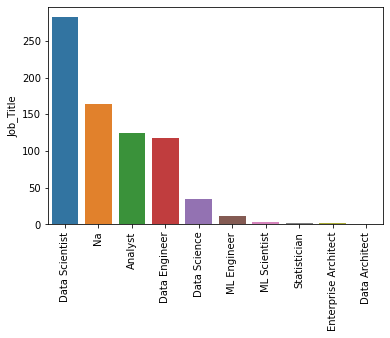

graph for Seniority: total = 742


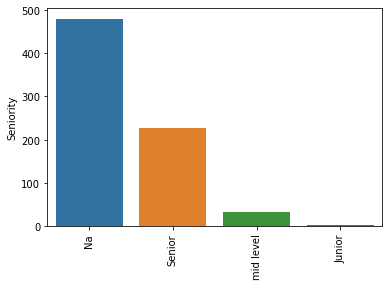

graph for Salary: total = 742


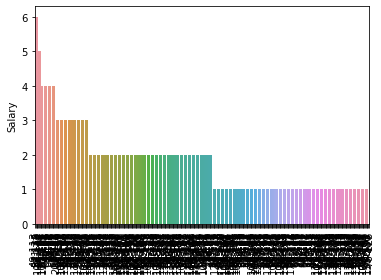

graph for Employer_Provide: total = 742


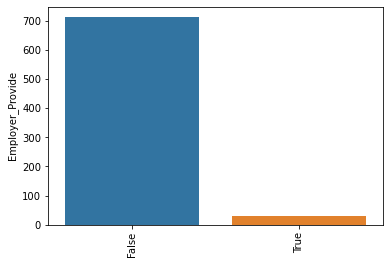

graph for Job_State: total = 742


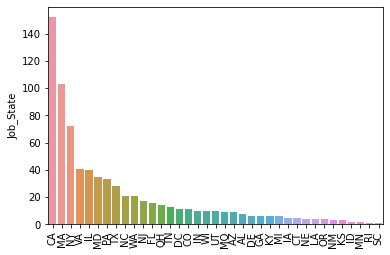

graph for Same_State: total = 742


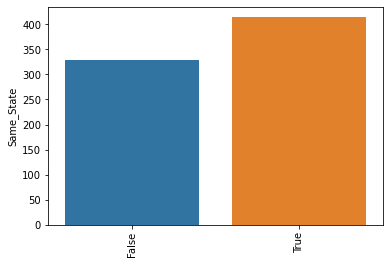

graph for Python: total = 742


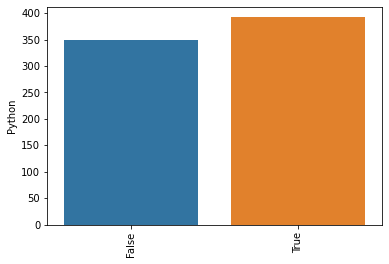

graph for Spark: total = 742


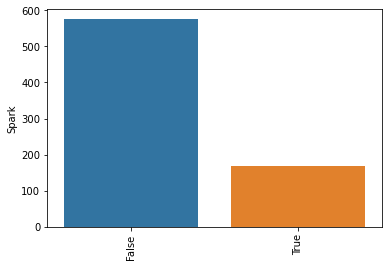

graph for R_Studio: total = 742


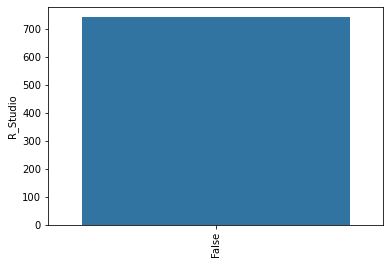

graph for SQL: total = 742


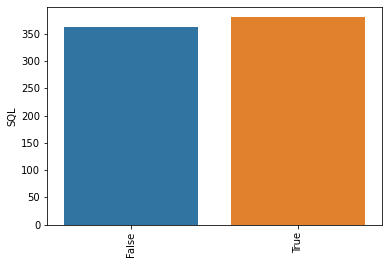

graph for AWS: total = 742


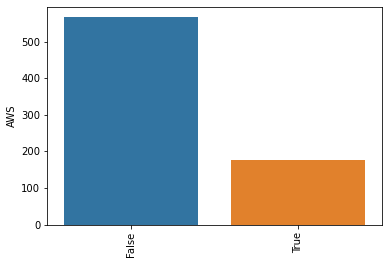

graph for Statistics: total = 742


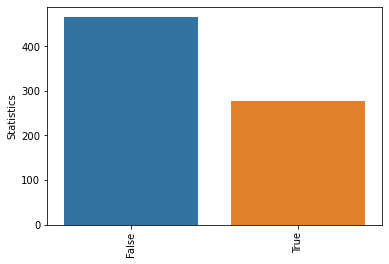

graph for Excel: total = 742


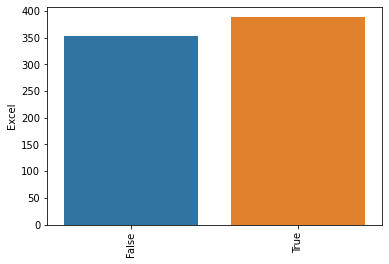

graph for Bachelor: total = 742


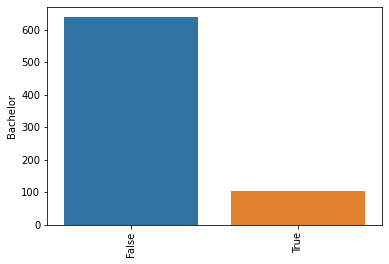

In [112]:
    
for i in qualitative.columns:
    col_num = qualitative[i].value_counts()
    print("graph for %s: total = %d" % (i, len(qualitative)))
    chart = sns.barplot(x=col_num.index, y=col_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [205]:
def barChart(value):
    col_num = value.value_counts()
    chart = sns.barplot(x=col_num.index, y=col_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    


From  bar chart I think this are column we should see more properly.

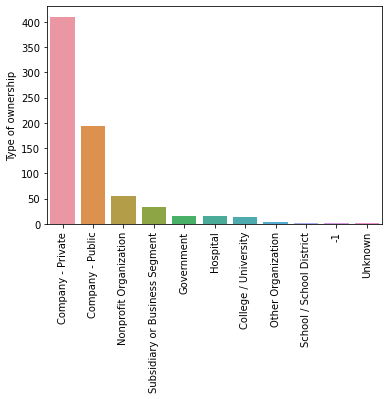

In [206]:
barChart(qualitative['Type of ownership'])

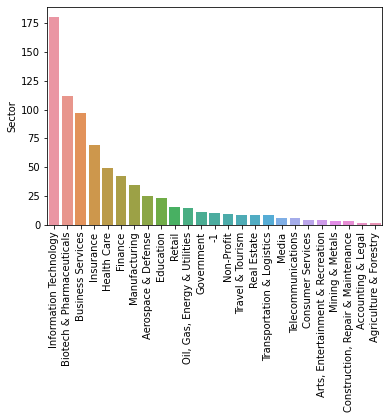

In [207]:
barChart(qualitative['Sector'])

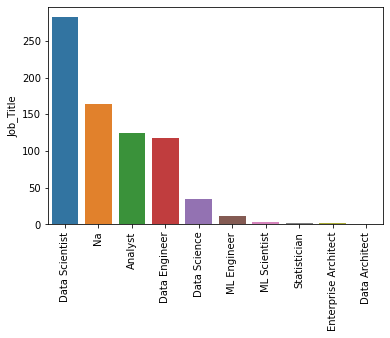

In [208]:
barChart(qualitative['Job_Title'])

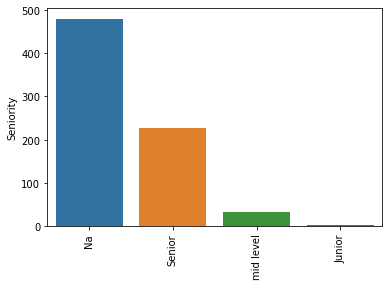

In [209]:
barChart(qualitative['Seniority'])

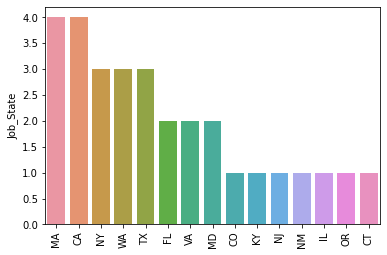

In [210]:
barChart(qualitative['Job_State'][:30])

In [212]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Job_Title',
       'Seniority', 'Salary', 'Min_Salary', 'Max_Salary', 'Average_Salary',
       'Employer_Provide', 'Company_Name', 'Job_State', 'Same_State',
       'Company_Age', 'Python', 'Spark', 'R_Studio', 'SQL', 'AWS',
       'Statistics', 'Excel', 'Bachelor', 'Description_len',
       'Competitiors_Number'],
      dtype='object')

I will make pivot table to see variables relation I am interested in.

In [225]:
pd.pivot_table(df, index = 'Job_Title', values = 'Average_Salary').sort_values(by = 'Average_Salary',ascending=True, na_position='first')

,Average_Salary
Job_Title,
Analyst,66.854839
Statistician,80.500000
Data Architect,86.500000
Na,89.871951
Data Engineer,105.800847
Data Scientist,117.308511
ML Engineer,119.958333
Data Science,124.279412
Enterprise Architect,129.500000


Seems Like Data Analyst make the less.

In [231]:
pd.pivot_table(df, index = ['Rating'], values = 'Average_Salary').sort_values(by = 'Average_Salary',ascending=True, na_position='first')

,Average_Salary
Rating,
2.4,60.214286
4.8,80.277778
2.9,81.138889
2.3,81.500000
2.8,83.928571
2.7,85.178571
3.0,85.588235
3.1,86.580000
1.9,87.500000


* Company's Rating > 3.5 does pay higher salary. Only exception for **4.8** rating
* Company's Rating < 3.5 does pay less salary. Only exception for **2.5** rating

In [236]:
pd.pivot_table(df, index = [ 'Company_Age'], values = 'Average_Salary').sort_values(by = 'Average_Salary',ascending=True, na_position='first').head(100)

,Average_Salary
Company_Age,
91,40.000000
44,44.437500
42,44.500000
35,47.583333
138,50.000000
...,...
240,132.285714
31,133.000000
59,139.000000


Company age seems like not a factor if the job salary is high or low

In [238]:
pd.pivot_table(df, index = [ 'Job_State'], values = 'Average_Salary').sort_values(by = 'Average_Salary',ascending=True, na_position='first').head(100)

,Average_Salary
Job_State,
NE,53.500000
DE,55.000000
ID,56.250000
LA,57.250000
AL,57.937500
SC,60.500000
CT,71.100000
WI,73.300000
NM,74.333333


We saw it in the bar chart before but it's more clear that state has relation in job salary. Where **CA , IL** are ahead in this game.

In [240]:
pd.pivot_table(df, index = [ 'Python','AWS', 'Excel', 'Bachelor'], values = 'Average_Salary').sort_values(by = 'Average_Salary',ascending=True, na_position='first').head(100)

Average_Salary
Python AWS   Excel Bachelor                
False  False True  True           67.961538
             False True           75.807692
             True  False          88.322314
             False False          90.714286
       True  False True           95.583333
True   False False True           98.625000
False  True  False False          98.888889
True   True  True  True          101.400000
       False True  True          104.547619
False  True  True  False         106.972222
True   False True  False         109.131356
       True  True  False         113.105263
       False False False         114.608333
       True  False True          116.833333
False  True  True  True          119.166667
True   True  False False         120.675000

## World Cloud

This code is not mine. I am giving the link of the main author.

In [272]:

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

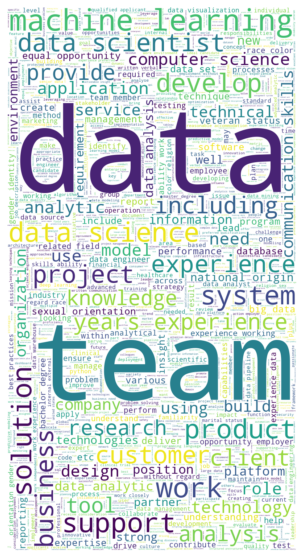

In [273]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()